In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'y')

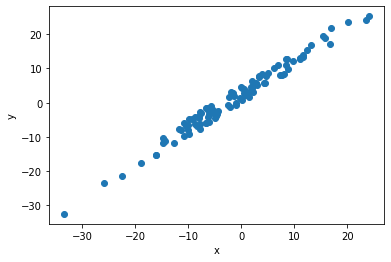

In [23]:
X = torch.randn(100, 1)*10
y = X + 5 *torch.rand(100, 1) 
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [24]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [25]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [26]:
[w, b] = model.parameters()


def get_params():
    return (w[0][0].item(), b[0].item())

In [27]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

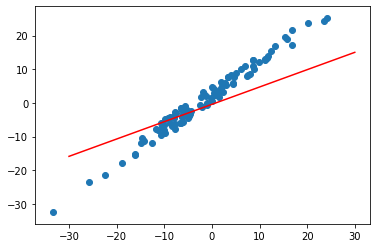

In [28]:
plot_fit('Initial Model')